### FINAL PROJECT(USING DATASCIENCE AND MACHINE LEARNING):

In [1]:
##.................................Using machine learning...............................................................#


import os
import numpy as np
import pandas as pd
import sklearn as ske
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
#loading the data frame (02-11-2015 to 30-09-2020)
df =pd.read_csv('Dataset.csv')
print(df.head(1322))

            Date  Temparature  Humidity  Airpollution  DustLabel
0     02-11-2015        11.20     70.21         20.34      33.11
1     03-11-2015        12.20     71.21         21.34      34.11
2     04-11-2015        13.20     72.21         22.34      35.11
3     05-11-2015        14.20     73.21         23.34      36.11
4     06-11-2015        15.20     74.21         24.34      37.11
...          ...          ...       ...           ...        ...
1317  26-09-2020        90.14    386.24        730.33     839.21
1318  27-09-2020        91.14    386.24        730.33     840.21
1319  28-09-2020        92.14    386.24        730.33     841.21
1320  29-09-2020        93.14    386.24        730.33     842.21
1321  30-09-2020        94.14    386.24        730.33     843.21

[1322 rows x 5 columns]


In [3]:
# Get the Adjusted with DustLabel
df = df[['DustLabel']] 
#Take a look at the new data 
print(df.head())

   DustLabel
0      33.11
1      34.11
2      35.11
3      36.11
4      37.11


In [4]:
# A variable for predicting 'n' days out into the future
forecast_out = 30           #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['DustLabel']].shift(-forecast_out)
#print the new data set
print(df.tail())

      DustLabel  Prediction
1317     839.21         NaN
1318     840.21         NaN
1319     841.21         NaN
1320     842.21         NaN
1321     843.21         NaN


In [5]:
#Create the independent data set (X)  #######
#Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 33.11]
 [ 34.11]
 [ 35.11]
 ...
 [811.21]
 [812.21]
 [813.21]]


In [6]:
#Create the dependent data set (y)  ####
#Convert the dataframe to a numpy array 

y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 63.11  64.11  65.11 ... 841.21 842.21 843.21]


In [7]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
#Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
#The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8314773723592975


In [10]:
#Create and train the Linear Regression  Model
lr = LinearRegression()
#Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
#The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8944575982523681


In [12]:
#Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[814.21]
 [815.21]
 [816.21]
 [817.21]
 [818.21]
 [819.21]
 [820.21]
 [821.21]
 [822.21]
 [823.21]
 [824.21]
 [825.21]
 [826.21]
 [827.21]
 [828.21]
 [829.21]
 [830.21]
 [831.21]
 [832.21]
 [833.21]
 [834.21]
 [835.21]
 [836.21]
 [837.21]
 [838.21]
 [839.21]
 [840.21]
 [841.21]
 [842.21]
 [843.21]]


In [13]:
#Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print('LR_prediction with 30 days Future forecast:')
print('\n')
print(lr_prediction)

LR_prediction with 30 days Future forecast:


[810.805699   811.75778505 812.70987111 813.66195717 814.61404323
 815.56612928 816.51821534 817.4703014  818.42238746 819.37447351
 820.32655957 821.27864563 822.23073168 823.18281774 824.1349038
 825.08698986 826.03907591 826.99116197 827.94324803 828.89533409
 829.84742014 830.7995062  831.75159226 832.70367831 833.65576437
 834.60785043 835.55993649 836.51202254 837.4641086  838.41619466]


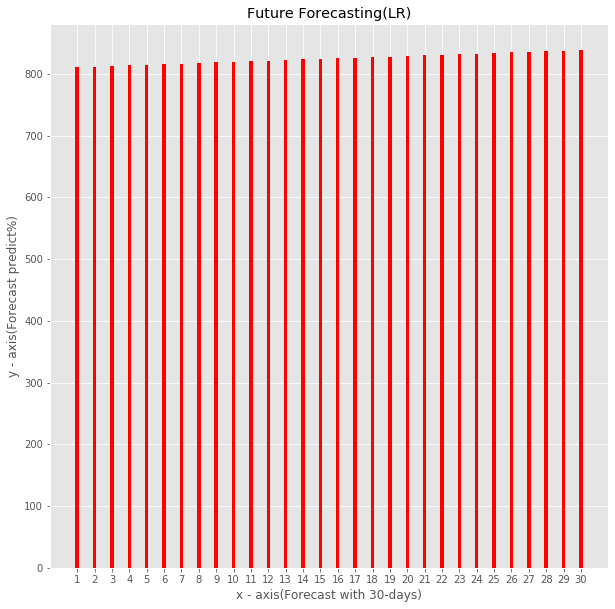

In [17]:
import datetime
import matplotlib.pyplot as plt 

# x-coordinates of left sides of
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 
  
# heights of bars(% of future forecast)
#height(y) = [0.938, 0.956, 0.906, 0.948, 0.954, 0.956, 0.89.....,.... ] 
height = list(lr_prediction)
  
# labels for bars 
tick_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 

size=10
fig,ax =plt.subplots(figsize=(size,size))

# plotting a bar chart 
plt.style.use('ggplot')
plt.bar(left, height, tick_label = tick_label, 
        width = 0.2, color = ['red'])#, 'green','yellow','blue','orange']) 
  
# naming the x-axis 
plt.xlabel('x - axis(Forecast with 30-days)') 
# naming the y-axis 
plt.ylabel('y - axis(Forecast predict%)') 
# plot title 
plt.title('Future Forecasting(LR)') 
  
# function to show the plot 
plt.show() 

In [15]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print('SVM_prediction with 30 days Future forecast:')
print('\n')
print(svm_prediction)

SVM_prediction with 30 days Future forecast:


[809.78381416 734.77099453 636.95489661 549.07182995 490.87232492
 461.46057792 449.8827324  446.28534337 445.39507459 445.21846462
 445.19024769 445.18660408 445.1862228  445.18619039 445.18618815
 445.18618803 445.18618802 445.18618802 445.18618802 445.18618802
 445.18618802 445.18618802 445.18618802 445.18618802 445.18618802
 445.18618802 445.18618802 445.18618802 445.18618802 445.18618802]


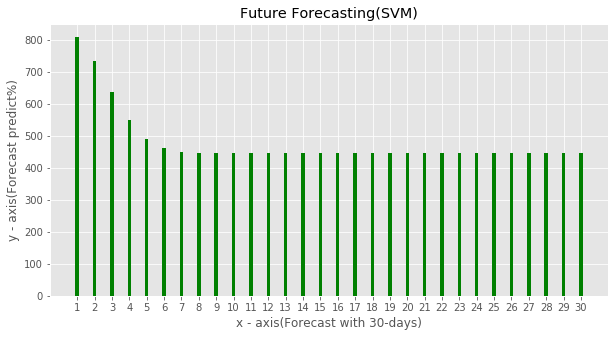

In [16]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 
  
# heights of bars(% of accuracy)
#height(y) = [0.938, 0.956, 0.906, 0.948, 0.954, 0.956, 0.89,.........,.... ] 
height = list(svm_prediction)
  
# labels for bars 

tick_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 

size=10
fig,ax =plt.subplots(figsize=(size,5))

# plotting a bar chart 
plt.style.use('ggplot')
plt.bar(left, height, tick_label = tick_label, 
        width = 0.2, color = ['green'])#, 'green','yellow','blue','orange'])
  
# naming the x-axis 
plt.xlabel('x - axis(Forecast with 30-days)') 
# naming the y-axis 
plt.ylabel('y - axis(Forecast predict%)') 
# plot title 
plt.title('Future Forecasting(SVM)') 
  
# function to show the plot 
plt.show() 